In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import pickle 
from sklearn.preprocessing import PolynomialFeatures

import numpy as np
import json 
import joblib
import sys 
import os
import csv
import os

## Data Loading

In [4]:
os.chdir("../../")
r = os.getcwd()
static_path = os.path.join(r, "stats", "comparison_files", "comparison_objects", "processed_data_distance_associator_solitair.json")
ace_w_path = os.path.join(r, "stats", "saved_results", "learning_experiments", "processed_data", "processed_data_ALL_DISTANCE_ASSOCIATORS_W_UCB.5_final.json")
ace_wo_path= os.path.join(r, "stats", "saved_results", "learning_experiments", "processed_data", "processed_data_ALL_DISTANCE_ASSOCIATORS_WO_UCB.5_final.json")

In [5]:
r

'/Users/spencerbrosnahan/Documents/GitHub/codenames-ensemble'

In [6]:
with open(static_path, "r") as f:
    static_data = json.load(f)
with open(ace_w_path, "r") as f:
    ace_w_data = json.load(f)
with open(ace_wo_path, "r") as f:
    ace_wo_data = json.load(f)

In [7]:
cols = ["Win Rate", "Average Win Time", "Min Win Time", "Average Red Words Flipped By Game", "Average Blue Words Flipped By Game","Average Bystander Words Flipped By Game", "Average Assassin Words Flipped By Game", "Final Pair Score"]

In [8]:
data = []

In [9]:
for d in [static_data, ace_w_data, ace_wo_data]:
    for cm in d:
        for g in d[cm]:
            row = []
            for s in cols:
                row.append(d[cm][g][s][0])
            data.append(row)

In [10]:
data_table = pd.DataFrame(data, columns=cols)

In [11]:
len(data_table)

113

In [12]:
data_table.head()

,Win Rate,Average Win Time,Min Win Time,Average Red Words Flipped By Game,Average Blue Words Flipped By Game,Average Bystander Words Flipped By Game,Average Assassin Words Flipped By Game,Final Pair Score
0,0.881853,5.206639,3.224000,8.468587,0.886147,0.771053,0.118147,0.846839
1,0.777933,6.375741,3.725333,8.006267,1.532373,1.340773,0.221760,-0.036113
2,0.957107,4.454772,2.930667,8.815560,0.327027,0.289000,0.042893,1.601976
3,0.880933,5.181492,3.180667,8.477400,0.889693,0.771133,0.119067,0.851417
4,0.857813,5.448871,3.323333,8.371160,1.060760,0.929627,0.142173,0.623495


In [13]:
X = data_table[cols[:-1]]
y = data_table[cols[-1]]

In [14]:
X.head()

,Win Rate,Average Win Time,Min Win Time,Average Red Words Flipped By Game,Average Blue Words Flipped By Game,Average Bystander Words Flipped By Game,Average Assassin Words Flipped By Game
0,0.881853,5.206639,3.224000,8.468587,0.886147,0.771053,0.118147
1,0.777933,6.375741,3.725333,8.006267,1.532373,1.340773,0.221760
2,0.957107,4.454772,2.930667,8.815560,0.327027,0.289000,0.042893
3,0.880933,5.181492,3.180667,8.477400,0.889693,0.771133,0.119067
4,0.857813,5.448871,3.323333,8.371160,1.060760,0.929627,0.142173


In [15]:
y.head()

0    0.846839
1   -0.036113
2    1.601976
3    0.851417
4    0.623495
Name: Final Pair Score, dtype: float64

## Expoloratory Data Analysis

From this, we may improve accuracy by using the log of Assassin Words and Average Win Time

In [16]:
def plot_data(data, target, col_name, add, bad_list):
    plt.title(col_name)
    plt.hist(data[col_name])
    plt.show()

    
    plt.title("log of " + col_name)
    if col_name in bad_list:
        plt.hist(np.log(data[col_name] + add))
    else:
        plt.hist(np.log(data[col_name]))
    plt.show()
    
    plt.title(f"{col_name}-CoLT")
    plt.scatter(data[col_name], target)
    plt.show()

    plt.title("log of " + col_name + "-CoLT")
    if col_name in bad_list:
        plt.scatter(np.log(data[col_name] + add), target)
    else:
        plt.scatter(np.log(data[col_name]), target)
    plt.show()

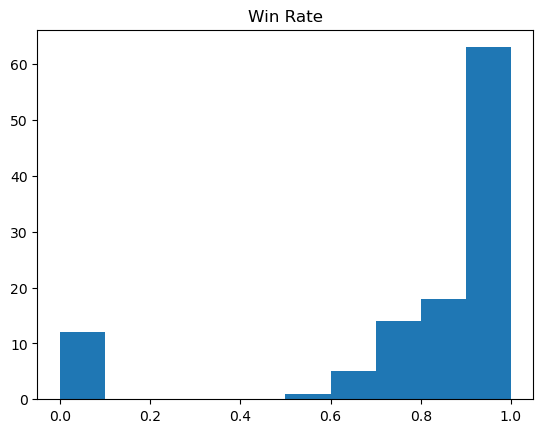

ValueError: supplied range of [-inf, 0.0] is not finite

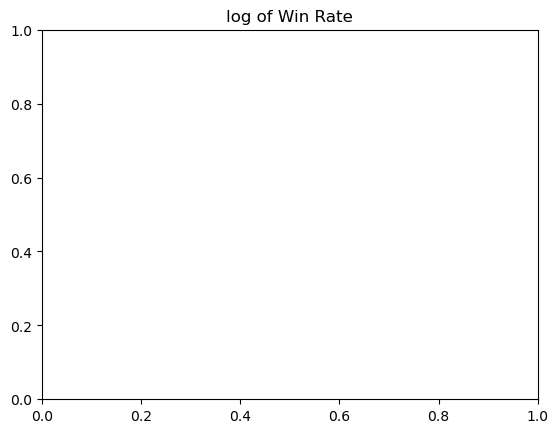

In [18]:
l = ["Average Blue Words Flipped By Game", "Average Bystander Words Flipped By Game", "Average Assassin Words Flipped By Game"]
for p in cols[:-1]:   
    plot_data(data_table, y, p, 1, l)

## Data Transformations/Prep

In [19]:
#We add the log transforms to X 
X["log(Average Assassin Words Flipped By Game + 1)"] = np.log(X["Average Assassin Words Flipped By Game"] + 1)
X["log(Average Win Time)"] = np.log(X["Average Win Time"])
X.head()

,Win Rate,Average Win Time,Min Win Time,Average Red Words Flipped By Game,Average Blue Words Flipped By Game,Average Bystander Words Flipped By Game,Average Assassin Words Flipped By Game,log(Average Assassin Words Flipped By Game + 1),log(Average Win Time)
0,0.881853,5.206639,3.224000,8.468587,0.886147,0.771053,0.118147,0.111673,1.649934
1,0.777933,6.375741,3.725333,8.006267,1.532373,1.340773,0.221760,0.200292,1.852500
2,0.957107,4.454772,2.930667,8.815560,0.327027,0.289000,0.042893,0.041999,1.493976
3,0.880933,5.181492,3.180667,8.477400,0.889693,0.771133,0.119067,0.112495,1.645093
4,0.857813,5.448871,3.323333,8.371160,1.060760,0.929627,0.142173,0.132933,1.695409


In [20]:
#Add all higher order terms

poly = PolynomialFeatures(2)
X_hot = poly.fit_transform(X)
hot_names = poly.get_feature_names_out(X.columns)
X_full = pd.DataFrame(X_hot,columns = hot_names)

X_full = X_full.T.drop_duplicates().T
X_full = X_full.dropna()
X_full = X_full.drop(columns=['1'])

X_full.head()

,Win Rate,Average Win Time,Min Win Time,Average Red Words Flipped By Game,Average Blue Words Flipped By Game,Average Bystander Words Flipped By Game,Average Assassin Words Flipped By Game,log(Average Assassin Words Flipped By Game + 1),log(Average Win Time),Win Rate^2,...,Average Bystander Words Flipped By Game^2,Average Bystander Words Flipped By Game Average Assassin Words Flipped By Game,Average Bystander Words Flipped By Game log(Average Assassin Words Flipped By Game + 1),Average Bystander Words Flipped By Game log(Average Win Time),Average Assassin Words Flipped By Game^2,Average Assassin Words Flipped By Game log(Average Assassin Words Flipped By Game + 1),Average Assassin Words Flipped By Game log(Average Win Time),log(Average Assassin Words Flipped By Game + 1)^2,log(Average Assassin Words Flipped By Game + 1) log(Average Win Time),log(Average Win Time)^2
0,0.881853,5.206639,3.224000,8.468587,0.886147,0.771053,0.118147,0.111673,1.649934,0.777665,...,0.594523,0.091097,0.086105,1.272187,0.013959,0.013194,0.194934,0.012471,0.184252,2.722284
1,0.777933,6.375741,3.725333,8.006267,1.532373,1.340773,0.221760,0.200292,1.852500,0.605180,...,1.797673,0.297330,0.268547,2.483783,0.049177,0.044417,0.410810,0.040117,0.371042,3.431757
2,0.957107,4.454772,2.930667,8.815560,0.327027,0.289000,0.042893,0.041999,1.493976,0.916053,...,0.083521,0.012396,0.012138,0.431759,0.001840,0.001801,0.064082,0.001764,0.062745,2.231964
3,0.880933,5.181492,3.180667,8.477400,0.889693,0.771133,0.119067,0.112495,1.645093,0.776044,...,0.594647,0.091816,0.086749,1.268586,0.014177,0.013394,0.195876,0.012655,0.185065,2.706331
4,0.857813,5.448871,3.323333,8.371160,1.060760,0.929627,0.142173,0.132933,1.695409,0.735844,...,0.864206,0.132168,0.123578,1.576097,0.020213,0.018900,0.241042,0.017671,0.225376,2.874410


In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [22]:
#Scale the data 
X_scalar = StandardScaler()
X_scalar.fit(X_full)
scaled_X = pd.DataFrame(X_scalar.transform(X_full), columns=X_full.columns)

y_scalar = StandardScaler()
y_scalar.fit(y.values.reshape(-1, 1))
scaled_y= pd.DataFrame(y_scalar.transform(y.values.reshape(-1, 1)), columns=["Final Pair Score"])

In [23]:
scaled_X.head()

,Win Rate,Average Win Time,Min Win Time,Average Red Words Flipped By Game,Average Blue Words Flipped By Game,Average Bystander Words Flipped By Game,Average Assassin Words Flipped By Game,log(Average Assassin Words Flipped By Game + 1),log(Average Win Time),Win Rate^2,...,Average Bystander Words Flipped By Game^2,Average Bystander Words Flipped By Game Average Assassin Words Flipped By Game,Average Bystander Words Flipped By Game log(Average Assassin Words Flipped By Game + 1),Average Bystander Words Flipped By Game log(Average Win Time),Average Assassin Words Flipped By Game^2,Average Assassin Words Flipped By Game log(Average Assassin Words Flipped By Game + 1),Average Assassin Words Flipped By Game log(Average Win Time),log(Average Assassin Words Flipped By Game + 1)^2,log(Average Assassin Words Flipped By Game + 1) log(Average Win Time),log(Average Win Time)^2
0,0.213453,-0.402943,-0.536542,0.207229,-0.176030,-0.559884,-0.212659,-0.141976,-0.421147,0.055960,...,-0.608474,-0.296217,-0.280257,-0.617319,-0.365775,-0.366909,-0.297527,-0.366600,-0.266123,-0.421041
1,-0.129626,-0.210491,-0.458722,-0.081264,0.638642,0.027197,0.129554,0.273214,-0.019828,-0.477249,...,-0.255629,0.160767,0.282899,-0.025930,-0.249753,-0.218177,-0.074286,-0.176251,0.012447,-0.122749
2,0.461892,-0.526712,-0.582076,0.423745,-0.880891,-1.056626,-0.461206,-0.468401,-0.730129,0.483764,...,-0.758335,-0.470608,-0.508579,-1.027538,-0.405698,-0.421176,-0.432844,-0.440318,-0.447333,-0.627191
3,0.210415,-0.407083,-0.543269,0.212729,-0.171559,-0.559802,-0.209621,-0.138123,-0.430739,0.050947,...,-0.608438,-0.294624,-0.278272,-0.619077,-0.365056,-0.365953,-0.296553,-0.365330,-0.264911,-0.427748
4,0.134088,-0.363068,-0.521123,0.146434,0.044098,-0.396479,-0.133304,-0.042370,-0.331055,-0.073324,...,-0.529385,-0.205210,-0.164588,-0.468978,-0.345170,-0.339729,-0.249846,-0.330794,-0.204794,-0.357081


In [24]:
scaled_y[:5]

,Final Pair Score
0,0.370062
1,-0.260437
2,0.909291
3,0.373331
4,0.210576


In [25]:
scaled_X = sm.add_constant(scaled_X)

In [26]:
#We now have all of the data transformations we could possibly want
scaled_X.head()

,const,Win Rate,Average Win Time,Min Win Time,Average Red Words Flipped By Game,Average Blue Words Flipped By Game,Average Bystander Words Flipped By Game,Average Assassin Words Flipped By Game,log(Average Assassin Words Flipped By Game + 1),log(Average Win Time),...,Average Bystander Words Flipped By Game^2,Average Bystander Words Flipped By Game Average Assassin Words Flipped By Game,Average Bystander Words Flipped By Game log(Average Assassin Words Flipped By Game + 1),Average Bystander Words Flipped By Game log(Average Win Time),Average Assassin Words Flipped By Game^2,Average Assassin Words Flipped By Game log(Average Assassin Words Flipped By Game + 1),Average Assassin Words Flipped By Game log(Average Win Time),log(Average Assassin Words Flipped By Game + 1)^2,log(Average Assassin Words Flipped By Game + 1) log(Average Win Time),log(Average Win Time)^2
0,1.0,0.213453,-0.402943,-0.536542,0.207229,-0.176030,-0.559884,-0.212659,-0.141976,-0.421147,...,-0.608474,-0.296217,-0.280257,-0.617319,-0.365775,-0.366909,-0.297527,-0.366600,-0.266123,-0.421041
1,1.0,-0.129626,-0.210491,-0.458722,-0.081264,0.638642,0.027197,0.129554,0.273214,-0.019828,...,-0.255629,0.160767,0.282899,-0.025930,-0.249753,-0.218177,-0.074286,-0.176251,0.012447,-0.122749
2,1.0,0.461892,-0.526712,-0.582076,0.423745,-0.880891,-1.056626,-0.461206,-0.468401,-0.730129,...,-0.758335,-0.470608,-0.508579,-1.027538,-0.405698,-0.421176,-0.432844,-0.440318,-0.447333,-0.627191
3,1.0,0.210415,-0.407083,-0.543269,0.212729,-0.171559,-0.559802,-0.209621,-0.138123,-0.430739,...,-0.608438,-0.294624,-0.278272,-0.619077,-0.365056,-0.365953,-0.296553,-0.365330,-0.264911,-0.427748
4,1.0,0.134088,-0.363068,-0.521123,0.146434,0.044098,-0.396479,-0.133304,-0.042370,-0.331055,...,-0.529385,-0.205210,-0.164588,-0.468978,-0.345170,-0.339729,-0.249846,-0.330794,-0.204794,-0.357081


In [27]:
#get a holdout set so we can see if the features we select are good or not
X_train, X_test, y_train, y_test = train_test_split(scaled_X, scaled_y, test_size=.2, random_state=1234)

## Feature Selection

In [28]:
import copy

In [29]:
def pval_selection(curr_cols):
    curr_cols = copy.deepcopy(curr_cols)
    curr_model = sm.OLS(y_train, X_train[curr_cols]).fit()

    while(max(curr_model.pvalues[1:]) > 0.05 and len(curr_cols) > 1):
        max_pvalue_ind = np.argmax(curr_model.pvalues[1:])+1
        del curr_cols[max_pvalue_ind]
        curr_model = sm.OLS(y_train, X_train[curr_cols]).fit()

    return curr_model, curr_cols

In [30]:
list(scaled_X.columns).index("Min Win Time")

3

In [31]:
base_cols = list(scaled_X.columns[:8])
full_cols = list(scaled_X.columns)
base_log_cols = copy.deepcopy(base_cols)
base_log_cols[base_log_cols.index("Average Win Time")] = full_cols[full_cols.index("log(Average Win Time)")]
base_log_cols[base_log_cols.index("Average Assassin Words Flipped By Game")] = full_cols[full_cols.index("log(Average Assassin Words Flipped By Game + 1)")]

In [32]:
scaled_X[base_log_cols].head()

,const,Win Rate,log(Average Win Time),Min Win Time,Average Red Words Flipped By Game,Average Blue Words Flipped By Game,Average Bystander Words Flipped By Game,log(Average Assassin Words Flipped By Game + 1)
0,1.0,0.213453,-0.421147,-0.536542,0.207229,-0.176030,-0.559884,-0.141976
1,1.0,-0.129626,-0.019828,-0.458722,-0.081264,0.638642,0.027197,0.273214
2,1.0,0.461892,-0.730129,-0.582076,0.423745,-0.880891,-1.056626,-0.468401
3,1.0,0.210415,-0.430739,-0.543269,0.212729,-0.171559,-0.559802,-0.138123
4,1.0,0.134088,-0.331055,-0.521123,0.146434,0.044098,-0.396479,-0.042370


In [33]:
m, base_reduced_cols = pval_selection(base_cols)
m.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Final Pair Score   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     739.1
Date:                Thu, 15 Jun 2023   Prob (F-statistic):           2.94e-61
Time:                        16:40:07   Log-Likelihood:                 15.951
No. Observations:                  90   AIC:                            -23.90
Df Residuals:                      86   BIC:                            -13.90
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.0105      0.022      0.479      0.633      -0.033       0.054
Average Red Words Flipped By Game           0.8785      0.021     42.385      0.000       0.837       0.920
Average Blue Words Flipped By Game         -0.3062      0.024    -12.695      0.000      -0.354      -0.258
Average Bystander Words Flipped By Game    -0.1998      0.025     -7.909      0.000      -0.250      -0.150
==============================================================================
Omnibus:                       30.849   Durbin-Watson:                   2.381
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              203.385
Skew:                          -0.736   Prob(JB):                     6.85e-45
Kurtosis:                      10.216   Cond. No.                         1.45
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
m, log_base_reduced_columns = pval_selection(base_log_cols)
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Final Pair Score   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     480.7
Date:                Thu, 15 Jun 2023   Prob (F-statistic):           3.21e-60
Time:                        16:40:08   Log-Likelihood:                 20.473
No. Observations:                  90   AIC:                            -28.95
Df Residuals:                      84   BIC:                            -13.95
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.0010      0.021      0.045      0.964      -0.042       0.044
Win Rate                                   -0.2089      0.092     -2.271      0.026      -0.392      -0.026
log(Average Win Time)                      -0.2589      0.087     -2.980      0.004      -0.432      -0.086
Average Red Words Flipped By Game           0.8338      0.059     14.195      0.000       0.717       0.951
Average Blue Words Flipped By Game         -0.3130      0.023    -13.326      0.000      -0.360      -0.266
Average Bystander Words Flipped By Game    -0.1479      0.030     -4.895      0.000      -0.208      -0.088
==============================================================================
Omnibus:                       24.704   Durbin-Watson:                   2.379
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              197.907
Skew:                          -0.312   Prob(JB):                     1.06e-43
Kurtosis:                      10.238   Cond. No.                         10.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
m, full_reduced_cols = pval_selection(full_cols)
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Final Pair Score   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     579.0
Date:                Thu, 15 Jun 2023   Prob (F-statistic):           7.22e-70
Time:                        16:40:09   Log-Likelihood:                 89.635
No. Observations:                  90   AIC:                            -143.3
Df Residuals:                      72   BIC:                            -98.27
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=============================================================================================================================================
                                                                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------
const                                                                         0.0352      0.012      2.970      0.004       0.012       0.059
Min Win Time                                                                236.9558    116.257      2.038      0.045       5.202     468.709
Win Rate^2                                                                   12.1399      2.630      4.616      0.000       6.897      17.382
Win Rate Average Win Time                                                    28.2543      7.907      3.573      0.001      12.493      44.016
Win Rate Min Win Time                                                       -73.5576     35.993     -2.044      0.045    -145.309      -1.806
Win Rate Average Red Words Flipped By Game                                  -14.6842      3.619     -4.058      0.000     -21.898      -7.471
Win Rate Average Blue Words Flipped By Game                                  -0.2719      0.018    -15.489      0.000      -0.307      -0.237
Win Rate Average Bystander Words Flipped By Game                              5.6297      0.389     14.483      0.000       4.855       6.405
Average Win Time Min Win Time                                               143.9351     38.313      3.757      0.000      67.559     220.311
Average Win Time Average Bystander Words Flipped By Game                      1.4268      0.095     14.996      0.000       1.237       1.617
Average Win Time Average Assassin Words Flipped By Game                     195.7348     55.492      3.527      0.001      85.113     306.356
Average Win Time log(Average Win Time)                                     -154.2704     44.063     -3.501      0.001    -242.108     -66.432
Min Win Time Average Assassin Words Flipped By Game                        -636.5786    224.861     -2.831      0.006   -1084.832    -188.325
Min Win Time log(Average Assassin Words Flipped By Game + 1)                240.5427     88.021      2.733      0.008      65.077     416.009
Min Win Time log(Average Win Time)                                          -43.8139     14.925     -2.936      0.004     -73.566     -14.062
Average Red Words Flipped By Game^2                                           5.8211      0.509     11.436      0.000       4.806       6.836
Average Red Words Flipped By Game Average Bystander Words Flipped By Game    -6.2845      0.420    -14.956      0.000      -7.122      -5.447
Average Red Words Flipped By Game Average Assassin Words Flipped By Game     -1.6518      0.242     -6.816      0.000      -2.135      -1.169
==============================================================================
Omnibus:              

## Model Building/ Testing

Best features to use were the base log cols which are the basic features with the appropriate log transformations for our exploratory data analysis. We can also predict fairly well using only Win Rate and the log of Average Win Time

In [36]:
# I have the different column options of "base_cols", "full_cols", and "reduced_cols"
#We need to drop the constant off eace because we are now working in sklearn
base_cols = base_cols[1:]
reduced_base_cols = base_reduced_cols[1:]
base_log_cols = base_log_cols[1:]
log_base_reduced_columns = log_base_reduced_columns[1:]
full_cols = full_cols[1:]
full_reduced_cols = full_reduced_cols[1:]

In [37]:
base_cols

['Win Rate',
 'Average Win Time',
 'Min Win Time',
 'Average Red Words Flipped By Game',
 'Average Blue Words Flipped By Game',
 'Average Bystander Words Flipped By Game',
 'Average Assassin Words Flipped By Game']

In [38]:
def create_sk_regression_model(X_train, y_train):
    reg_prep = LinearRegression()
    mod = reg_prep.fit(X_train, y_train)
    return mod 

def get_model_scores(in_p, in_t, out_p, out_t):

    in_sample_mspe = np.sqrt(mean_squared_error(in_t, in_p))
    out_sample_mspe = np.sqrt(mean_squared_error(out_t, out_p))
    in_sample_r2 = r2_score(in_t, in_p)
    out_sample_r2 = r2_score(out_t, out_p)
    
    print("In sample MSPE: ", in_sample_mspe)
    print("Out of sample MSPE: ", out_sample_mspe)
    print("In sample R^2: ", in_sample_r2)
    print("Out of sample R^2: ", out_sample_r2)

def get_predictions(model, in_X, out_X):
    in_preds = model.predict(in_X)
    out_preds = model.predict(out_X)
    return in_preds, out_preds

def test_features(features, X_train, X_test, y_train, y_test):
    model = create_sk_regression_model(X_train[features], y_train)
    in_preds, out_preds = get_predictions(model, X_train[features], X_test[features])
    get_model_scores(in_preds, y_train, out_preds, y_test)

In [39]:
test_features(base_cols, X_train, X_test, y_train, y_test)

In sample MSPE:  0.1961246863748066
Out of sample MSPE:  0.11229045893203736
In sample R^2:  0.9650341834270824
Out of sample R^2:  0.9786969020291034


In [40]:
test_features(reduced_base_cols, X_train, X_test, y_train, y_test)

In sample MSPE:  0.20267169229800244
Out of sample MSPE:  0.15135557917629813
In sample R^2:  0.9626607716634835
Out of sample R^2:  0.9612961721249346


In [41]:
test_features(base_log_cols, X_train, X_test, y_train, y_test)

In sample MSPE:  0.19037614161033703
Out of sample MSPE:  0.09122721809584121
In sample R^2:  0.9670538863639315
Out of sample R^2:  0.9859393332818572


In [42]:
test_features(log_base_reduced_columns, X_train, X_test, y_train, y_test)

In sample MSPE:  0.1927392398536615
Out of sample MSPE:  0.09753413202904858
In sample R^2:  0.9662309040226671
Out of sample R^2:  0.9839279861501268


In [43]:
test_features(full_cols, X_train, X_test, y_train, y_test)

In sample MSPE:  0.0777729281786756
Out of sample MSPE:  8.59184591884368
In sample R^2:  0.9945016035314576
Out of sample R^2:  -123.71825079347009


In [44]:
test_features(full_reduced_cols, X_train, X_test, y_train, y_test)

In sample MSPE:  0.08937825382959705
Out of sample MSPE:  0.7972742892498247
In sample R^2:  0.9927382234360568
Out of sample R^2:  -0.07392157932284493


In [45]:
## I want to see how well I can predict with only Win time and win rate
test_features(["Win Rate", "log(Average Win Time)"], X_train, X_test, y_train, y_test)

In sample MSPE:  0.456196408455927
Out of sample MSPE:  0.39267874096634675
In sample R^2:  0.810816666169025
Out of sample R^2:  0.7394855419770212


In [46]:
test_features(["Win Rate", "Average Win Time"], X_train, X_test, y_train, y_test)

In sample MSPE:  0.4939056963725807
Out of sample MSPE:  0.6317123205073218
In sample R^2:  0.7782481657468144
Out of sample R^2:  0.32578913742285853


In [47]:
test_features(["Win Rate", "log(Average Win Time)", "Min Win Time"], X_train, X_test, y_train, y_test)

In sample MSPE:  0.39723740845401445
Out of sample MSPE:  0.2396313642878472
In sample R^2:  0.8565569765431296
Out of sample R^2:  0.9029837750213827


## Pipeline Setup

In [55]:

class MyPipeline:
    def __init__(self, model=None, X_scaler=None, y_scaler=None, log_indices=None, log1_indices=None, obj=None):

        #check stuff 
        if model == None and  X_scalar == None and y_scalar == None and log_indices == None and log1_indices == None and obj == None:
            raise Exception("Invalid arguments")
        
        if obj != None:
            try:
                self.model = obj.model 
            except:
                self.model = None
            try:
                self.X_scaler = obj.X_scaler
            except:
                self.X_scaler = None
            try:
                self.y_scaler = obj.y_scaler 
            except:
                self.y_scaler = None
            try:
                self.log_indices = obj.log_indices 
            except:
                self.log_indices = []
            try:
                self.log1_indices = obj.log1_indices
            except:
                self.log1_indices = []
        else:
            self.model = model 
            self.X_scaler = X_scaler 
            self.y_scaler = y_scaler
            self.log_indices = log_indices
            self.log1_indices = log1_indices

    
    def predict(self, data):
        #log transform the data 
        for i in self.log_indices:
            data[:, i] = np.log(data[:, i])
        for i in self.log1_indices:
            data[:, i] = np.log(data[:, i] + 1)

        #scale it
        data = self.X_scaler.transform(data)

        out = self.model.predict(data)

        out = self.y_scaler.inverse_transform(out.reshape(-1, 1))

        return out

def create_pipeline(cols, features, target, log_indices, log1_indices):
    features = features[cols].to_numpy()
    X_scale = StandardScaler()
    X_scale.fit(features)

    target = target.to_numpy().reshape(-1, 1)
    y_scale = StandardScaler()
    y_scale.fit(target)

    scaled_X = X_scale.transform(features)
    scaled_y = y_scale.transform(target)

    model = create_sk_regression_model(scaled_X, scaled_y)

    pipe = MyPipeline(model, X_scale, y_scale, log_indices, log1_indices)

    return pipe
    



In [68]:
pipe = create_pipeline(["Win Rate", "log(Average Win Time)"], X_full, y, [1], [])

In [69]:
pipe.predict(X[["Win Rate", "Average Win Time"]].to_numpy()[:3])

array([[ 0.81553226],
       [-0.10168209],
       [ 1.50275337]])

In [70]:
y[:3]

0    0.846839
1   -0.036113
2    1.601976
Name: Final Pair Score, dtype: float64

In [71]:

with open("/Users/spencerbrosnahan/Documents/GitHub/codenames-ai/stats/other/pipeline.pkl", 'wb') as f:
    pickle.dump(pipe, f)

In [72]:
pipe.model.coef_

array([[ 0.46099599, -0.53719423]])

In [ ]:
log_base_reduced_columns

['Win Rate',
 'log(Average Win Time)',
 'Min Win Time',
 'Average Red Words Flipped By Game',
 'Average Blue Words Flipped By Game',
 'log(Average Assassin Words Flipped By Game + 1)']

In [ ]:
pipe = create_pipeline(log_base_reduced_columns, X_full, y, [1], [5])
pipe.predict(X[["Win Rate", "Average Win Time", "Min Win Time", "Average Red Words Flipped By Game", \
                "Average Blue Words Flipped By Game", "Average Assassin Words Flipped By Game"]].to_numpy()[:3])

array([[ 0.81501728],
       [-0.02378082],
       [ 1.57772289]])

In [ ]:
y[:3]

0    0.846839
1   -0.036113
2    1.601976
Name: Final Pair Score, dtype: float64

In [ ]:
pipe.model.coef_

array([[-0.91778169, -0.06900851,  0.09062066,  0.1756649 , -0.55502172,
        -1.20108434]])

In [ ]:
log_base_reduced_columns

['Win Rate',
 'log(Average Win Time)',
 'Min Win Time',
 'Average Red Words Flipped By Game',
 'Average Blue Words Flipped By Game',
 'log(Average Assassin Words Flipped By Game + 1)']

In [ ]:
pipe.predict(np.array([[1.0, 3, 1, 9, 0, 0],
              [.90, 3, 1, 9, 0, 0]]))

array([[1.76977687],
       [2.5632449 ]])

## Use Final Model

In [56]:
path = "/Users/spencerbrosnahan/Documents/GitHub/codenames-ai/data_objects/models/CoLT-Estimator-Pipeline.pkl"

with open(path, "rb") as f:
    m = pickle.load(f)



In [57]:
m = MyPipeline(obj=m)

In [63]:
m.model.coef_

array([[ 0.46099599, -0.53719423]])

In [78]:
pipe.predict(np.array([[.90, 9.1], 
                        [.867, 7.4],
                        [.667, 6.2],
                        [.778, 6.4]]))

array([[-0.49868356],
       [-0.11666843],
       [-0.47439984],
       [-0.11084725]])

In [301]:
path = "/Users/spencerbrosnahan/Documents/GitHub/codenames-ai/stats/other/kim-spymaster-comparison.csv"

df = pd.read_csv(path)

In [302]:
df.head()

,Unnamed: 0,Win Rate,Unnamed: 2,Unnamed: 3,Unnamed: 4,Win Time,Unnamed: 6,Unnamed: 7,Unnamed: 8,Min Win Time,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,Team,Low,Medium,High,Average,Low,Medium,High,Average,Low,Medium,High,Average
1,w2v-g50 with w2v-g50,86.7,83.3,100,90,5.7,4.9,3.4,4.666666667,4,3,3,3.333333333
2,w2v-g50 with w2v-g100,96.7,96.7,86.7,93.36666667,8.3,6.3,4.7,6.433333333,7,4,3,4.666666667
3,w2v-g50 with w2v-g200,96.7,96.7,66.7,86.7,8.3,6.3,5,6.533333333,7,4,3,4.666666667
4,w2v-g50 with w2v-g300,93.3,93.3,80,88.86666667,8.4,6.4,4.9,6.566666667,7,4,3,4.666666667


In [303]:
#This is the data we'll use
dfc = df.iloc[1:, :]
dfc.head()

,Unnamed: 0,Win Rate,Unnamed: 2,Unnamed: 3,Unnamed: 4,Win Time,Unnamed: 6,Unnamed: 7,Unnamed: 8,Min Win Time,Unnamed: 10,Unnamed: 11,Unnamed: 12
1,w2v-g50 with w2v-g50,86.7,83.3,100,90,5.7,4.9,3.4,4.666666667,4,3,3,3.333333333
2,w2v-g50 with w2v-g100,96.7,96.7,86.7,93.36666667,8.3,6.3,4.7,6.433333333,7,4,3,4.666666667
3,w2v-g50 with w2v-g200,96.7,96.7,66.7,86.7,8.3,6.3,5,6.533333333,7,4,3,4.666666667
4,w2v-g50 with w2v-g300,93.3,93.3,80,88.86666667,8.4,6.4,4.9,6.566666667,7,4,3,4.666666667
5,w2v-g50 with w2v,90,86.7,66.7,81.13333333,9.1,7.4,6.2,7.566666667,7,5,5,5.666666667


In [304]:
len(dfc.columns)

13

In [305]:
new_cols = [df.iloc[0, 0]]
for t, d in zip(list(df.columns)[1:], list(df.iloc[0, 1:])):
    if "Unnamed" not in t:
        curr_stat = t
    new_cols.append(d + " ~ " + curr_stat)

In [306]:
len(new_cols)

13

In [307]:
new_cols[0]

'Team'

In [308]:
data = pd.DataFrame(dfc.to_numpy(), columns=new_cols)

In [309]:
data.set_index(new_cols[0], inplace=True)

In [310]:
data = data.astype(float)

In [311]:
data.head()

,Low ~ Win Rate,Medium ~ Win Rate,High ~ Win Rate,Average ~ Win Rate,Low ~ Win Time,Medium ~ Win Time,High ~ Win Time,Average ~ Win Time,Low ~ Min Win Time,Medium ~ Min Win Time,High ~ Min Win Time,Average ~ Min Win Time
Team,,,,,,,,,,,,
w2v-g50 with w2v-g50,86.7,83.3,100.0,90.000000,5.7,4.9,3.4,4.666667,4.0,3.0,3.0,3.333333
w2v-g50 with w2v-g100,96.7,96.7,86.7,93.366667,8.3,6.3,4.7,6.433333,7.0,4.0,3.0,4.666667
w2v-g50 with w2v-g200,96.7,96.7,66.7,86.700000,8.3,6.3,5.0,6.533333,7.0,4.0,3.0,4.666667
w2v-g50 with w2v-g300,93.3,93.3,80.0,88.866667,8.4,6.4,4.9,6.566667,7.0,4.0,3.0,4.666667
w2v-g50 with w2v,90.0,86.7,66.7,81.133333,9.1,7.4,6.2,7.566667,7.0,5.0,5.0,5.666667


In [312]:
for c in [e for e in data.columns if "Win Rate" in e]:
    data[c] = data[c] / 100


In [313]:
data.head()

,Low ~ Win Rate,Medium ~ Win Rate,High ~ Win Rate,Average ~ Win Rate,Low ~ Win Time,Medium ~ Win Time,High ~ Win Time,Average ~ Win Time,Low ~ Min Win Time,Medium ~ Min Win Time,High ~ Min Win Time,Average ~ Min Win Time
Team,,,,,,,,,,,,
w2v-g50 with w2v-g50,0.867,0.833,1.000,0.900000,5.7,4.9,3.4,4.666667,4.0,3.0,3.0,3.333333
w2v-g50 with w2v-g100,0.967,0.967,0.867,0.933667,8.3,6.3,4.7,6.433333,7.0,4.0,3.0,4.666667
w2v-g50 with w2v-g200,0.967,0.967,0.667,0.867000,8.3,6.3,5.0,6.533333,7.0,4.0,3.0,4.666667
w2v-g50 with w2v-g300,0.933,0.933,0.800,0.888667,8.4,6.4,4.9,6.566667,7.0,4.0,3.0,4.666667
w2v-g50 with w2v,0.900,0.867,0.667,0.811333,9.1,7.4,6.2,7.566667,7.0,5.0,5.0,5.666667


In [320]:
#Now we use our pipe to predict scores 
low_indices = [i for i in range(len(data.columns)) if "Low" in list(data.columns)[i]]
med_indices = [i for i in range(len(data.columns)) if "Medium" in list(data.columns)[i]]
high_indices = [i for i in range(len(data.columns)) if "High" in list(data.columns)[i]]
avg_indices = [i for i in range(len(data.columns)) if "Average" in list(data.columns)[i]]

In [322]:
low_data = data.iloc[:, low_indices]
med_data = data.iloc[:, med_indices]
high_data = data.iloc[:, high_indices]
avg_data = data.iloc[:, avg_indices]

In [323]:
low_features = low_data.drop(columns=[i for i in low_data.columns if "Min Win Time" in i])
med_features = med_data.drop(columns=[i for i in med_data.columns if "Min Win Time" in i])
high_features = high_data.drop(columns=[i for i in high_data.columns if "Min Win Time" in i])
avg_features = avg_data.drop(columns=[i for i in avg_data.columns if "Min Win Time" in i])

In [324]:
low_preds = pipe.predict(low_features.to_numpy())
med_preds = pipe.predict(med_features.to_numpy())
high_preds = pipe.predict(high_features.to_numpy())
avg_preds = pipe.predict(avg_features.to_numpy())

In [325]:
temp_data = np.concatenate([low_preds, med_preds, high_preds, avg_preds], axis=1)

In [326]:
colt_df = pd.DataFrame(temp_data, columns=["Low ~ CoLT", "Medium ~ CoLT", "High ~ CoLT", "Average ~ CoLT"])


In [327]:
colt_df.head()

,Low ~ CoLT,Medium ~ CoLT,High ~ CoLT,Average ~ CoLT
0,0.531514,0.771561,2.344702,1.159755
1,-0.003139,0.681528,1.010557,0.496668
2,-0.003139,0.681528,0.059792,0.192661
3,-0.168389,0.506911,0.640039,0.266377
4,-0.498684,-0.116668,-0.474400,-0.393840


In [328]:
counts = {e:0 for e in colt_df.columns}
counts

{'Low ~ CoLT': 0, 'Medium ~ CoLT': 0, 'High ~ CoLT': 0, 'Average ~ CoLT': 0}

In [329]:
bests = np.array([list(colt_df.columns)[np.argmax(row)] for row in colt_df.to_numpy()]).reshape(-1, 1)

In [330]:
for e in bests:
    counts[e[0]] += 1
counts

{'Low ~ CoLT': 1, 'Medium ~ CoLT': 5, 'High ~ CoLT': 34, 'Average ~ CoLT': 0}

In [332]:
colt_df["Best Team"] = bests

In [333]:
colt_df.head()

,Low ~ CoLT,Medium ~ CoLT,High ~ CoLT,Average ~ CoLT,Best Team
0,0.531514,0.771561,2.344702,1.159755,High ~ CoLT
1,-0.003139,0.681528,1.010557,0.496668,High ~ CoLT
2,-0.003139,0.681528,0.059792,0.192661,Medium ~ CoLT
3,-0.168389,0.506911,0.640039,0.266377,High ~ CoLT
4,-0.498684,-0.116668,-0.474400,-0.393840,Medium ~ CoLT


In [334]:
data.index

Index(['w2v-g50 with w2v-g50', 'w2v-g50 with w2v-g100',
       'w2v-g50 with w2v-g200', 'w2v-g50 with w2v-g300', 'w2v-g50 with w2v',
       'w2v-g50 with g50', 'w2v-g50 with g100', 'w2v-g50 with g200',
       'w2v-g50 with g300', 'Average', 'w2v-g100 with w2v-g50',
       'w2v-g100 with w2v-g100', 'w2v-g100 with w2v-g200',
       'w2v-g100 with w2v-g300', 'w2v-g100 with w2v', 'w2v-g100 with g50',
       'w2v-g100 with g100', 'w2v-g100 with g200', 'w2v-g100 with g300',
       'Average', 'w2v-g200 with w2v-g50', 'w2v-g200 with w2v-g100',
       'w2v-g200 with w2v-g200', 'w2v-g200 with w2v-g300', 'w2v-g200 with w2v',
       'w2v-g200 with g50', 'w2v-g200 with g100', 'w2v-g200 with g200',
       'w2v-g200 with g300', 'Average', 'w2v-g300 with w2v-g50',
       'w2v-g300 with w2v-g100', 'w2v-g300 with w2v-g200',
       'w2v-g300 with w2v-g300', 'w2v-g300 with w2v', 'w2v-g300 with g50',
       'w2v-g300 with g100', 'w2v-g300 with g200', 'w2v-g300 with g300',
       'Average'],
      dtype='ob

In [335]:
teams = np.array(data.index)
teams = teams.reshape(-1, 1)
teams[0]

array(['w2v-g50 with w2v-g50'], dtype=object)

In [336]:
colt_df.insert(0, "Team", teams)

In [337]:
colt_df.set_index("Team", inplace=True)

In [338]:
colt_df.head()

,Low ~ CoLT,Medium ~ CoLT,High ~ CoLT,Average ~ CoLT,Best Team
Team,,,,,
w2v-g50 with w2v-g50,0.531514,0.771561,2.344702,1.159755,High ~ CoLT
w2v-g50 with w2v-g100,-0.003139,0.681528,1.010557,0.496668,High ~ CoLT
w2v-g50 with w2v-g200,-0.003139,0.681528,0.059792,0.192661,Medium ~ CoLT
w2v-g50 with w2v-g300,-0.168389,0.506911,0.640039,0.266377,High ~ CoLT
w2v-g50 with w2v,-0.498684,-0.116668,-0.474400,-0.393840,Medium ~ CoLT


In [300]:
save_path = "/Users/spencerbrosnahan/Documents/GitHub/codenames-ai/stats/other/kim-spymaster-comparison-colt.csv"

colt_df.to_csv(save_path)